In [1]:
!pip install world_bank_data --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for world-bank-data: filename=world_bank_data-0.1.3-py3-none-any.whl size=11110 sha256=4bf951dcb2a166d0fd04f60bf9e9c491a375ea9f78181fca2c53499775ea9e7c
  Stored in directory: /root/.cache/pip/wheels/fe/17/0c/9ef630351acc5856f4a1814d96bc082eccf1cbbb779fcd1a98
Successfully built world-bank-data


In [2]:
import os
import json
from datetime import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

import world_bank_data as wb

In [ ]:
pcap = pd.DataFrame(wb.get_series('SL.GDP.PCAP.EM.KD', date='1990:2022', id_or_value='id', simplify_index=True))
pcap

SL.GDP.PCAP.EM.KD
Country Year                   
AFE     1990                NaN
        1991        8244.518639
        1992        7850.405134
        1993        7582.666373
        1994        7486.980479
...                         ...
ZWE     2017        5228.429113
        2018        5388.118118
        2019        4969.081523
        2020        4652.733381
        2021        4775.607588

[8512 rows x 1 columns]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
wi_df = pd.read_csv('/content/drive/MyDrive/Northeastern/Projects/IE6600 Final Project/World Bank Selected Indicators.xlsx - Sheet1.csv')
wi_df

In [ ]:
import pandas as pd
from google.colab import files
files.upload()
wi_df = pd.read_csv('World Bank Selected Indicators - Sheet1.csv')

In [5]:
indicators = list(wi_df['Indicator Code'].dropna())
indicators

['NY.GDP.MKTP.KD.ZG',
 'GC.XPN.INTP.CN',
 'GC.XPN.TOTL.GD.ZS',
 'GC.DOD.TOTL.GD.ZS',
 'NY.GDP.MKTP.CD',
 'NY.GDP.PCAP.CD',
 'NY.GDP.PCAP.PP.CD',
 'NY.GNS.ICTR.ZS',
 'NY.GDP.DEFL.KD.ZG',
 'GC.XPN.INTP.ZS',
 'SL.UEM.TOTL.ZS',
 'FP.CPI.TOTL.ZG',
 'BX.KLT.DINV.CD.WD',
 'FR.INR.LNDP',
 'FR.INR.LEND',
 'FM.LBL.BMNY.GD.ZS',
 'CM.MKT.LCAP.GD.ZS',
 'FS.AST.PRVT.GD.ZS',
 'FS.AST.DOMS.GD.ZS',
 'CM.MKT.TRAD.GD.ZS',
 'NE.EXP.GNFS.ZS',
 'NE.IMP.GNFS.ZS',
 'SL.TLF.ACTI.ZS',
 'IC.TAX.LABR.CP.ZS',
 'EN.ATM.CO2E.PC',
 'EG.ELC.RNWX.ZS',
 'SH.STA.SMSS.ZS',
 'AG.PRD.FOOD.XD',
 'AG.LND.FRST.ZS',
 'FS.AST.PRVT.GD.ZS',
 'TG.VAL.TOTL.GD.ZS',
 'GC.DOD.TOTL.GD.ZS',
 'GC.XPN.TOTL.GD.ZS',
 'MS.MIL.XPND.GD.ZS',
 'GC.AST.TOTL.GD.ZS',
 'GC.LBL.TOTL.GD.ZS',
 'GC.NFN.TOTL.GD.ZS',
 'GC.NLD.TOTL.GD.ZS',
 'GC.REV.XGRT.GD.ZS',
 'GC.TAX.TOTL.GD.ZS',
 'GB.XPD.RSDV.GD.ZS',
 'TG.VAL.TOTL.GD.ZS',
 'SE.XPD.TOTL.GD.ZS',
 'SE.XPD.PRIM.PC.ZS',
 'SE.XPD.SECO.PC.ZS',
 'SE.XPD.TERT.PC.ZS',
 'NY.GDP.TOTL.RT.ZS',
 'DT.DOD.DECT.GN.ZS',
 

In [6]:
data = pd.DataFrame()
for ind in indicators:
  data2 = wb.get_series(ind, date='1990:2020', id_or_value='id', simplify_index=True)
  data = pd.concat([data, data2], axis=1)

In [7]:
data

NY.GDP.MKTP.KD.ZG  GC.XPN.INTP.CN  GC.XPN.TOTL.GD.ZS  \
AFE 1990          -0.039677             NaN                NaN   
    1991           0.105301             NaN                NaN   
    1992          -1.979118             NaN                NaN   
    1993          -0.392300             NaN                NaN   
    1994           2.025857             NaN                NaN   
...                     ...             ...                ...   
ZWE 2016           0.755869     142501584.0          25.236347   
    2017           4.709492     229797540.0          28.413719   
    2018           4.824211     761307154.0          20.697183   
    2019          -6.144236             NaN                NaN   
    2020          -6.248748             NaN                NaN   

          GC.DOD.TOTL.GD.ZS  NY.GDP.MKTP.CD  ...  SH.IMM.MEAS  \
AFE 1990                NaN    2.532240e+11  ...    59.305126   
    1991                NaN    2.734028e+11  ...    53.933170   
    1992                NaN    2.382554e+11  ...    53.950285   
    1993                NaN    2.365269e+11  ...    56.196562   
    1994                NaN    2.401201e+11  ...    61.210240   
...                     ...             ...  ...          ...   
ZWE 2016                NaN    2.054868e+10  ...    95.000000   
    2017                NaN    1.758489e+10  ...    90.000000   
    2018                NaN    1.811554e+10  ...    88.000000   
    2019                NaN    1.928429e+10  ...    85.000000   
    2020                NaN    1.805117e+10  ...    85.000000   

          SP.POP.1564.TO.ZS  SP.POP.1564.TO.ZS  SL.TLF.TOTL.IN  SP.POP.1564.TO  
AFE 1990          51.430660          51.430660     120062718.0     156682481.0  
    1991          51.477748          51.477748     123616494.0     161328531.0  
    1992          51.587893          51.587893     127344638.0     166252340.0  
    1993          51.746670          51.746670     131230462.0     171418905.0  
    1994          51.937393          51.937393     135250938.0     176784467.0  
...                     ...                ...             ...             ...  
ZWE 2016          54.473134          54.473134       6802164.0       7642765.0  
    2017          54.505941          54.505941       6909356.0       7759792.0  
    2018          54.659410          54.659410       7028775.0       7892169.0  
    2019          54.861265          54.861265       7156060.0       8034692.0  
    2020          55.074722          55.074722       7204228.0       8185716.0  

[8246 rows x 101 columns]

In [ ]:
mr_df

,code,iso2code,name
id,,,
1,EAS,Z4,East Asia & Pacific
2,ECS,Z7,Europe & Central Asia
,EUU,EU,European Union
3,LCN,ZJ,Latin America & Caribbean
4,MEA,ZQ,Middle East & North Africa
6,NAC,XU,North America
8,SAS,8S,South Asia


In [ ]:
mr_df

,code,iso2code,name
id,,,
1,EAS,Z4,East Asia & Pacific
2,ECS,Z7,Europe & Central Asia
,EUU,EU,European Union
3,LCN,ZJ,Latin America & Caribbean
4,MEA,ZQ,Middle East & North Africa
6,NAC,XU,North America
8,SAS,8S,South Asia


In [9]:
countries = wb.get_countries()
EAP = countries[countries['region'] == 'East Asia & Pacific']

In [ ]:
countries = wb.get_countries()
countries['incomeLevel'].value_counts()
countries = countries[(countries['incomeLevel'] != 'Low income') & (countries['incomeLevel'] != 'Not classified')]

In [ ]:
countries = wb.get_countries()
countries['incomeLevel'].value_counts()

High income            81
Aggregates             81
Lower middle income    54
Upper middle income    54
Low income             28
Not classified          1
Name: incomeLevel, dtype: int64

In [ ]:
EAP = countries[countries['region'] == 'East Asia & Pacific']
EAP = EAP.dropna(subset = ['longitude', 'latitude'])
EAP

,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
id,,,,,,,,,
ASM,AS,American Samoa,East Asia & Pacific,East Asia & Pacific (excluding high income),Upper middle income,Not classified,Pago Pago,-170.691000,-14.284600
AUS,AU,Australia,East Asia & Pacific,,High income,Not classified,Canberra,149.129000,-35.282000
BRN,BN,Brunei Darussalam,East Asia & Pacific,,High income,Not classified,Bandar Seri Begawan,114.946000,4.941990
CHN,CN,China,East Asia & Pacific,East Asia & Pacific (excluding high income),Upper middle income,IBRD,Beijing,116.286000,40.049500
FJI,FJ,Fiji,East Asia & Pacific,East Asia & Pacific (excluding high income),Upper middle income,Blend,Suva,178.399000,-18.114900
...,...,...,...,...,...,...,...,...,...
TON,TO,Tonga,East Asia & Pacific,East Asia & Pacific (excluding high income),Upper middle income,IDA,Nuku'alofa,-175.216000,-21.136000
TUV,TV,Tuvalu,East Asia & Pacific,East Asia & Pacific (excluding high income),Upper middle income,IDA,Funafuti,179.089567,-8.631488
VNM,VN,Vietnam,East Asia & Pacific,East Asia & Pacific (excluding high income),Lower middle income,IBRD,Hanoi,105.825000,21.006900


In [ ]:
chosen =['AUS',
 'KOR',
 'PHL',
 'SGP',
 'THA',
 'GBR',
 'HUN',
 'ROU',
 'SWE',
 'JAM',
 'PER',
 'JOR',
 'USA',
 'IND']

In [ ]:
chosen_data = data.loc[chosen,:,:]
chosen_data

NY.GDP.MKTP.KD.ZG  GC.XPN.INTP.CN  GC.XPN.TOTL.GD.ZS  \
AUS 1990           3.573507    7.364000e+09          21.822977   
    1991          -0.395087    6.192000e+09          23.171087   
    1992           0.413780    5.748000e+09          24.439892   
    1993           4.033567    5.413000e+09          24.969497   
    1994           3.980474    6.630000e+09          25.092045   
...                     ...             ...                ...   
IND 2016           8.256306    4.791960e+12          15.271950   
    2017           6.795383    5.292460e+12          15.614110   
    2018           6.453851    5.741910e+12          15.663132   
    2019           3.737919             NaN                NaN   
    2020          -6.596081             NaN                NaN   

          GC.DOD.TOTL.GD.ZS  NY.GDP.MKTP.CD  ...  SH.IMM.MEAS  \
AUS 1990          12.231535    3.113267e+11  ...         86.0   
    1991          11.921499    3.259030e+11  ...         86.0   
    1992          14.147185    3.254803e+11  ...         86.0   
    1993          17.874332    3.121262e+11  ...         86.0   
    1994          20.188463    3.228073e+11  ...         86.0   
...                     ...             ...  ...          ...   
IND 2016          47.633756    2.294798e+12  ...         88.0   
    2017          47.583609    2.651473e+12  ...         90.0   
    2018          46.522499    2.702930e+12  ...         93.0   
    2019                NaN    2.831552e+12  ...         95.0   
    2020                NaN    2.667688e+12  ...         89.0   

          SP.POP.1564.TO.ZS  SP.POP.1564.TO.ZS  SL.TLF.TOTL.IN  SP.POP.1564.TO  
AUS 1990          66.851833          66.851833       8475893.0      11408332.0  
    1991          66.860327          66.860327       8524976.0      11556139.0  
    1992          66.781131          66.781131       8601726.0      11683359.0  
    1993          66.662599          66.662599       8634061.0      11777281.0  
    1994          66.582205          66.582205       8799677.0      11888253.0  
...                     ...                ...             ...             ...  
IND 2016          66.274262          66.274262     469541836.0     877814039.0  
    2017          66.538187          66.538187     471675710.0     890731260.0  
    2018          66.766742          66.766742     473422438.0     903115190.0  
    2019          67.003811          67.003811     482700285.0     915551973.0  
    2020          67.265500          67.265500     457779812.0     928266848.0  

[434 rows x 101 columns]

<Figure size 2160x1296 with 0 Axes>

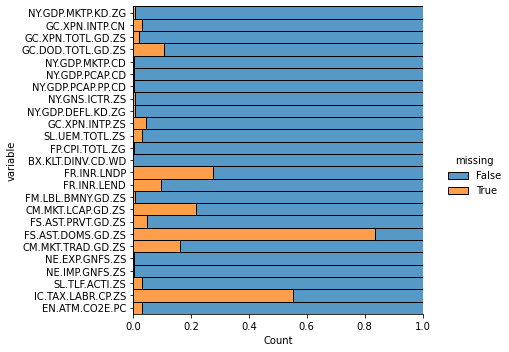

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=chosen_data.iloc[:,0:25].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=chosen_data.iloc[:,25:50].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=chosen_data.iloc[:,50:75].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:
plt.figure(figsize=(50,200))
sns.displot(
    data=chosen_data.iloc[:,75:].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [ ]:
def calculate_quality(data,rate):
  not_good_list = []
  for i in range(data.shape[1]):
    if (sum(data.iloc[:,i].isna())/len(data.iloc[:,i])) >rate:
      #print(f'{data.columns[i]}:{(sum(data.iloc[:,i].isna())/len(data.iloc[:,i]))}')
      not_good_list.append(data.columns[i])
  print(f'There are {len(not_good_list)} columns with missing value rate larger than {100*rate}%')
  return not_good_list

In [ ]:
drop_list_country= calculate_quality(chosen_data ,0.2)

There are 27 columns with missing value rate larger than 20.0%


In [ ]:
drop_list_country

['FR.INR.LNDP',
 'CM.MKT.LCAP.GD.ZS',
 'FS.AST.DOMS.GD.ZS',
 'IC.TAX.LABR.CP.ZS',
 'SH.STA.SMSS.ZS',
 'GC.AST.TOTL.GD.ZS',
 'GB.XPD.RSDV.GD.ZS',
 'SE.XPD.TOTL.GD.ZS',
 'SE.XPD.PRIM.PC.ZS',
 'SE.XPD.SECO.PC.ZS',
 'SE.XPD.TERT.PC.ZS',
 'DT.DOD.DECT.GN.ZS',
 'DT.DOD.DPNG.CD',
 'DT.DOD.DPPG.CD',
 'DT.DOD.DECT.CD',
 'EN.POP.EL5M.ZS',
 'SI.POV.DDAY',
 'EN.ATM.PM25.MC.ZS',
 'EN.POP.EL5M.ZS',
 'EN.POP.SLUM.UR.ZS',
 'SI.SPR.PC40',
 'SI.SPR.PCAP.ZG',
 'SI.SPR.PC40.ZG',
 'SI.SPR.PCAP',
 'BX.GRT.EXTA.CD.WD',
 'PX.REX.REER',
 'SL.TLF.ADVN.ZS']

In [ ]:
chosen_data_d = chosen_data.drop(drop_list_country, axis=1)
na_columns = chosen_data_d.columns[chosen_data_d.isnull().any()]

<Figure size 2160x1296 with 0 Axes>

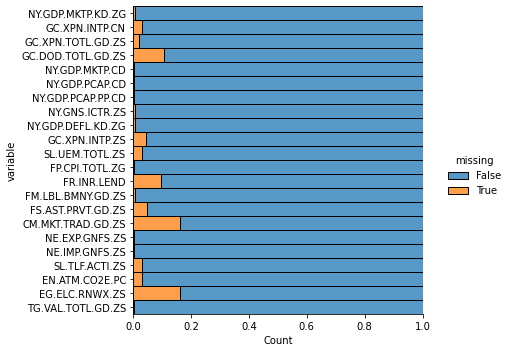

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=chosen_data_d.loc[:,na_columns[0:25]].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

<Figure size 2160x1296 with 0 Axes>

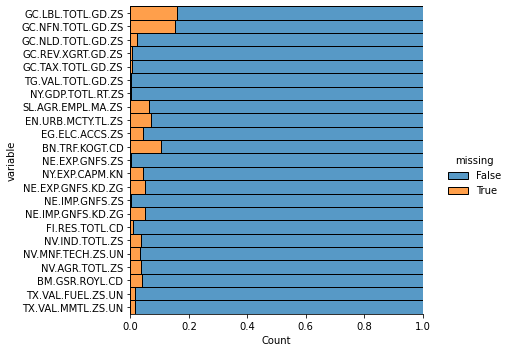

In [ ]:
plt.figure(figsize=(30,18))
sns.displot(
    data=chosen_data_d.loc[:,na_columns[25:]].isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)